<a href="https://colab.research.google.com/github/darwinagudeloh/FDL_2024-2_UDEA/blob/main/04_Modelo_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import requests
from io import BytesIO
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam  # Importar Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
# Descarga los archivos de datos desde GitHub
base_url = "https://raw.githubusercontent.com/JulianaCarvajal/Proyecto_Deep_Learning/main/"
files = ["X_train_7.npy", "y_train_7.npy", "X_val_7.npy", "y_val_7.npy", "X_test_7.npy", "y_test_7.npy"]

# Descargar los archivos y cargarlos en arrays
data_dict = {}
for file in files:
    url = base_url + file
    response = requests.get(url)
    if response.status_code == 200:
        # Cargar el archivo .npy directamente desde el contenido descargado
        data_dict[file.split(".")[0]] = np.load(BytesIO(response.content))
        print(f"{file} descargado y cargado con éxito.")
    else:
        print(f"Error al descargar {file}. Código de estado: {response.status_code}")

# Extraer los arrays del diccionario
X_train_7 = data_dict["X_train_7"]
y_train_7 = data_dict["y_train_7"]
X_val_7 = data_dict["X_val_7"]
y_val_7 = data_dict["y_val_7"]
X_test_7 = data_dict["X_test_7"]
y_test_7 = data_dict["y_test_7"]

X_train_7.npy descargado y cargado con éxito.
y_train_7.npy descargado y cargado con éxito.
X_val_7.npy descargado y cargado con éxito.
y_val_7.npy descargado y cargado con éxito.
X_test_7.npy descargado y cargado con éxito.
y_test_7.npy descargado y cargado con éxito.


In [ ]:
# Verificar las dimensiones de los datos
print(f"Dimensiones de X_train_7: {X_train_7.shape}")
print(f"Dimensiones de y_train_7: {y_train_7.shape}")

Dimensiones de X_train_7: (2530, 30, 6)
Dimensiones de y_train_7: (2530,)


In [ ]:
# Definir el modelo
def create_rnn_model(input_shape):
    model = Sequential()
    model.add(LSTM(64, activation='tanh', return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.3))  # Evitar sobreajuste
    model.add(LSTM(32, activation='tanh'))
    model.add(Dropout(0.3))
    model.add(Dense(1))  # Salida unidimensional
    model.compile(optimizer='adam', loss='mae', metrics=['mse'])
    return model

In [ ]:
# Crear el modelo
input_shape = (X_train_7.shape[1], X_train_7.shape[2])  # (longitud de la secuencia, número de características)
model = create_rnn_model(input_shape)
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 30, 64)              │          18,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 30, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,625 (119.63 KB)

 Trainable params: 30,625 (119.63 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Definir Early Stopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Entrenar el modelo
history = model.fit(
    X_train_7, y_train_7,
    validation_data=(X_val_7, y_val_7),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.1442 - mse: 0.0339 - val_loss: 0.1266 - val_mse: 0.0257
Epoch 2/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.1298 - mse: 0.0263 - val_loss: 0.1259 - val_mse: 0.0253
Epoch 3/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1303 - mse: 0.0272 - val_loss: 0.1258 - val_mse: 0.0253
Epoch 4/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.1306 - mse: 0.0281 - val_loss: 0.1260 - val_mse: 0.0245
Epoch 5/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.1250 - mse: 0.0256 - val_loss: 0.1249 - val_mse: 0.0246
Epoch 6/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1315 - mse: 0.0276 - val_loss: 0.1253 - val_mse: 0.0251
Epoch 7/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.1246 - mse: 0.0253 - val_loss: 0.1247 - val_mse: 0.0244
Epoch 8/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.1272 - mse: 0.0256 - val_loss: 0.1253 - val_mse: 0.0243
Epoch 9/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - lo

In [ ]:
# Evaluar el Modelo
# Evaluación en el conjunto de prueba
test_loss, test_mse = model.evaluate(X_test_7, y_test_7)
print(f"Pérdida en prueba (Loss): {test_loss}")
print(f"MSE en prueba: {test_mse}")

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1211 - mse: 0.0226
Pérdida en prueba (Loss): 0.12027854472398758
MSE en prueba: 0.022857965901494026


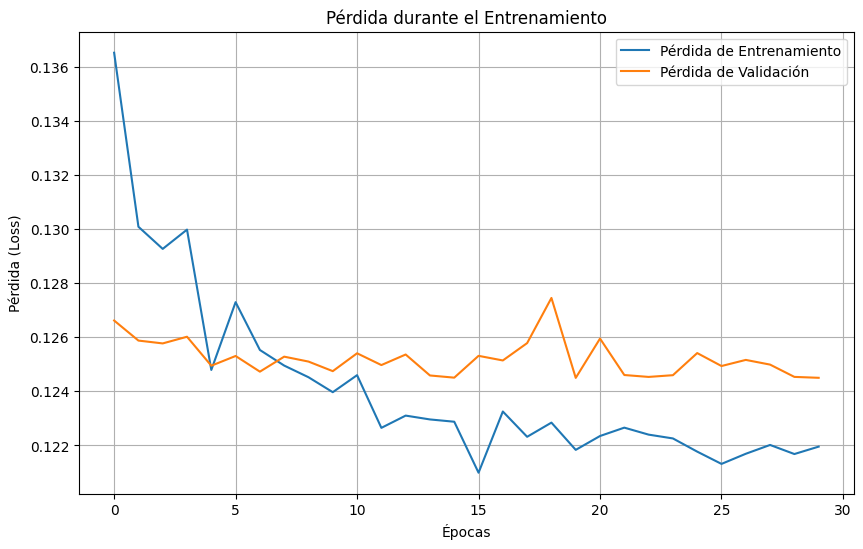

In [ ]:
# Graficar el Proceso de Entrenamiento
# Pérdida (Loss) durante el entrenamiento
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida (Loss)')
plt.title('Pérdida durante el Entrenamiento')
plt.legend()
plt.grid()
plt.show()

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
MAE: 0.12027854289708702
RMSE: 0.15118851910754208


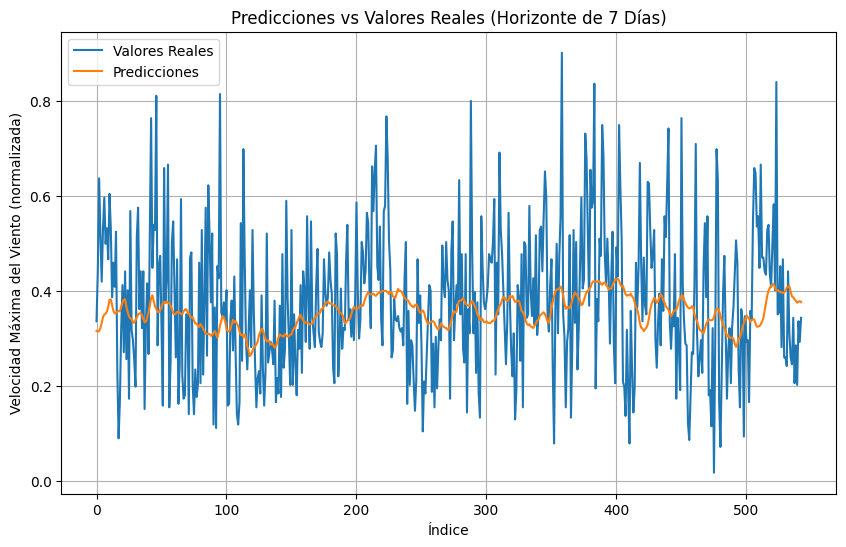

In [ ]:
# Predicciones y Comparaciones
y_pred = model.predict(X_test_7)

# Calcular métricas adicionales
mae = mean_absolute_error(y_test_7, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_7, y_pred))
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

# Graficar predicciones vs valores reales
plt.figure(figsize=(10, 6))
plt.plot(y_test_7, label='Valores Reales')
plt.plot(y_pred, label='Predicciones')
plt.xlabel('Índice')
plt.ylabel('Velocidad Máxima del Viento (normalizada)')
plt.title('Predicciones vs Valores Reales (Horizonte de 7 Días)')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Redefinir el Modelo Mejorado
def create_optimized_rnn_model(input_shape):
    model = Sequential()

    # Primera capa LSTM con mayor capacidad
    model.add(LSTM(128, activation='tanh', return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.3))  # Dropout para evitar sobreajuste

    # Segunda capa LSTM
    model.add(LSTM(64, activation='tanh', return_sequences=True))
    model.add(Dropout(0.3))

    # Tercera capa LSTM
    model.add(LSTM(32, activation='tanh'))
    model.add(Dropout(0.3))

    # Capa de salida con regularización L2
    model.add(Dense(1, kernel_regularizer=l2(0.01)))

    # Compilar el modelo con Adam optimizado
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mae', metrics=['mse'])
    return model

In [ ]:
# Crear el modelo con la forma de entrada (sequence_length, n_features)
input_shape = (X_train_7.shape[1], X_train_7.shape[2])
optimized_model = create_optimized_rnn_model(input_shape)
optimized_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 30, 128)             │          69,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 30, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 30, 64)              │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 30, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 130,977 (511.63 KB)

 Trainable params: 130,977 (511.63 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Entrenamiento con Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Entrenar el modelo
history_optimized = optimized_model.fit(
    X_train_7, y_train_7,
    validation_data=(X_val_7, y_val_7),
    epochs=100,  # Aumentar épocas para experimentar con más entrenamiento
    batch_size=64,  # Probar con un tamaño de lote más grande
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 112ms/step - loss: 0.2057 - mse: 0.0576 - val_loss: 0.1528 - val_mse: 0.0292
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 111ms/step - loss: 0.1521 - mse: 0.0289 - val_loss: 0.1445 - val_mse: 0.0255
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 120ms/step - loss: 0.1462 - mse: 0.0272 - val_loss: 0.1426 - val_mse: 0.0252
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step - loss: 0.1424 - mse: 0.0265 - val_loss: 0.1466 - val_mse: 0.0262
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 146ms/step - loss: 0.1457 - mse: 0.0277 - val_loss: 0.1392 - val_mse: 0.0248
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 8s 100ms/step - loss: 0.1390 - mse: 0.0258 - val_loss: 0.1384 - val_mse: 0.0247
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 145ms/step - loss: 0.1373 - mse: 0.0254 - val_loss: 0.1374 - val_mse: 0.0260
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - loss: 0.1374 - mse: 0.0267 - val_loss: 0.1356 - val_mse: 0.0254
Epoch 9/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/s

In [ ]:
# Evaluar el Modelo
# Evaluación en el conjunto de prueba
test_loss_optimized, test_mse_optimized = optimized_model.evaluate(X_test_7, y_test_7)
print(f"Pérdida en prueba (Loss): {test_loss_optimized}")
print(f"MSE en prueba: {test_mse_optimized}")

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1216 - mse: 0.0227
Pérdida en prueba (Loss): 0.12151253968477249
MSE en prueba: 0.023352662101387978


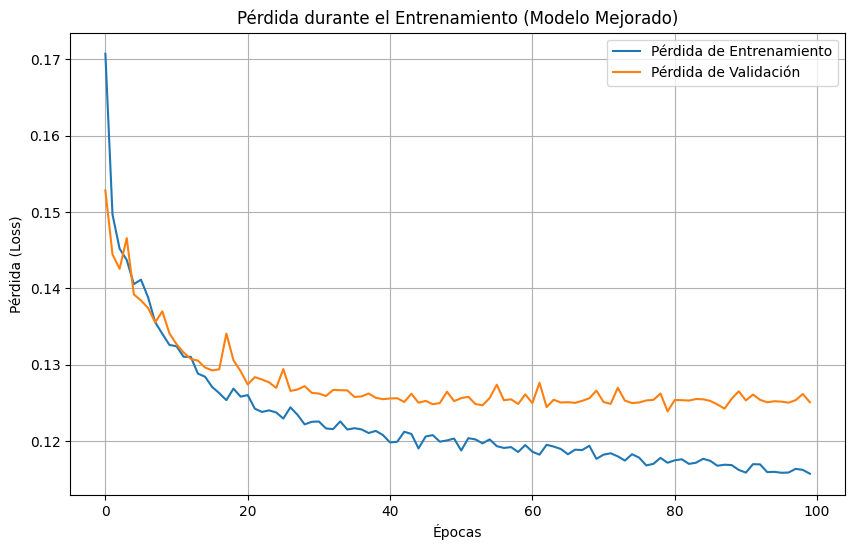

In [ ]:
# Graficar el Proceso de Entrenamiento
# Pérdida durante el entrenamiento
plt.figure(figsize=(10, 6))
plt.plot(history_optimized.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history_optimized.history['val_loss'], label='Pérdida de Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida (Loss)')
plt.title('Pérdida durante el Entrenamiento (Modelo Mejorado)')
plt.legend()
plt.grid()
plt.show()

17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step
MAE: 0.12136279662634696
RMSE: 0.15281577948543457


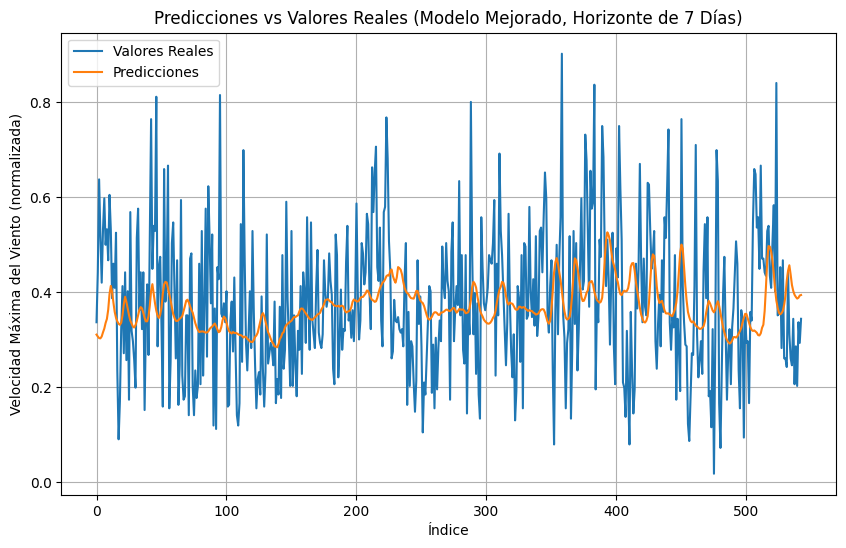

In [ ]:
# Predicciones y Comparaciones
# Hacer predicciones en el conjunto de prueba
y_pred_optimized = optimized_model.predict(X_test_7)

# Calcular métricas adicionales
mae_optimized = mean_absolute_error(y_test_7, y_pred_optimized)
rmse_optimized = np.sqrt(mean_squared_error(y_test_7, y_pred_optimized))
print(f"MAE: {mae_optimized}")
print(f"RMSE: {rmse_optimized}")

# Graficar predicciones vs valores reales
plt.figure(figsize=(10, 6))
plt.plot(y_test_7, label='Valores Reales')
plt.plot(y_pred_optimized, label='Predicciones')
plt.xlabel('Índice')
plt.ylabel('Velocidad Máxima del Viento (normalizada)')
plt.title('Predicciones vs Valores Reales (Modelo Mejorado, Horizonte de 7 Días)')
plt.legend()
plt.grid()
plt.show()